In [ ]:
from time import process_time
t1_start = process_time()

In [ ]:
import os
import datetime as dt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
os.getcwd() # get the current working directory

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_folder = '/content/drive/MyDrive/MATH_6373/MATH_6373_HW_03/'
os.chdir(base_folder) # change the current working directory to

base_name = ['CAMBRIA', 'FRANKLIN', 'LUCIDA', 'SWIS721', 'TAHOMA'] 

def output(n):
  a = (np.zeros([1, len(base_name)]))
  a[0, n - 1] = 1
  return a

for index, value in enumerate(base_name):
  exec("{x} = pd.read_csv(f'{x}.csv')".format(x = value))
  exec('CL{y} = {x}'.format(x = value, y = index + 1))
  exec("CL{y} = CL{y}.loc[(CL{y}['strength'] == 0.4) & (CL{y}['italic'] == 0)]".format(y = index + 1))
  exec("X_CL{y} = np.uint8(CL{y}.loc[:, 'r0c0': 'r19c19'].astype(float))".format(y = index + 1))
  exec('Y_CL{y} = np.float32(np.repeat(a = output({y}), repeats = len(CL{y}.index), axis = 0))'.format(y = index + 1))
  exec('pd_CL{y} = np.random.choice(a = 2, size = len(CL{y}.index), replace = True, p = [0.80, 0.20])'.format(y = index + 1))
  exec('train_CL{y} = CL{y}.loc[pd_CL{y} == 0]'.format(y = index + 1))
  exec('test_CL{y} = CL{y}.loc[pd_CL{y} == 1]'.format(y = index + 1))
  exec('Y_train_CL{y} = Y_CL{y}[1: (train_CL{y}.shape[0] + 1), :]'.format(y = index + 1))
  exec('Y_test_CL{y} = Y_CL{y}[1: (test_CL{y}.shape[0] + 1), :]'.format(y = index + 1))

for value in ['train', 'test']:
  exec("X_{x} = np.uint8(pd.concat([{x}_CL1, {x}_CL2, {x}_CL3, {x}_CL4, {x}_CL5], axis = 0).loc[:, 'r0c0': 'r19c19'].astype(float))".format(x = value))
  exec("y_{x} = pd.concat([{x}_CL1, {x}_CL2, {x}_CL3, {x}_CL4, {x}_CL5], axis = 0).loc[:, 'font']".format(x = value))
  exec('Y_{x} = np.concatenate([Y_{x}_CL1, Y_{x}_CL2, Y_{x}_CL3, Y_{x}_CL4, Y_{x}_CL5], axis = 0)'.format(x = value))

In [ ]:
y = pd.concat([CL1, CL2, CL3, CL4, CL5], axis = 0).loc[:, 'font']
y

0       CAMBRIA
1       CAMBRIA
2       CAMBRIA
3       CAMBRIA
4       CAMBRIA
         ...   
3318     TAHOMA
3319     TAHOMA
3320     TAHOMA
3321     TAHOMA
3322     TAHOMA
Name: font, Length: 17616, dtype: object

In [ ]:
Y = np.concatenate([Y_CL1, Y_CL2, Y_CL3, Y_CL4, Y_CL5])
print(len(Y))
Y

17616


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
X = np.concatenate([X_CL1, X_CL2, X_CL3, X_CL4, X_CL5]).reshape(-1, 20, 20, 1)
print(X.shape)


(17616, 20, 20, 1)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for value in np.arange(1, len(base_name) + 1).tolist():
  exec('image_{x} = X_CL{x}[0, ].reshape(20, 20)'.format(x = value))

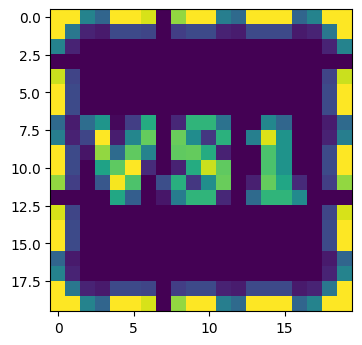

In [ ]:
plt.figure(dpi = 100)
plt.imshow(image_1)
plt.show()

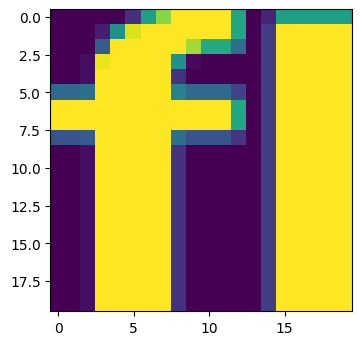

In [ ]:
plt.figure(dpi = 100)
plt.imshow(image_2)
plt.show()

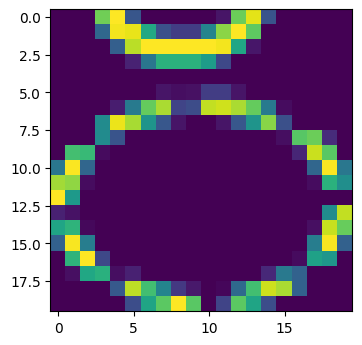

In [ ]:
plt.figure(dpi = 100)
plt.imshow(image_3)
plt.show()

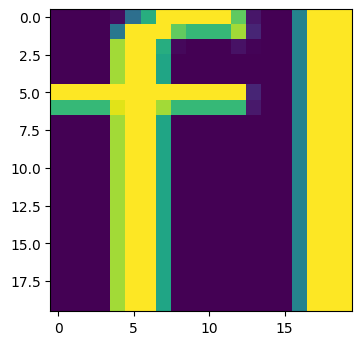

In [ ]:
plt.figure(dpi = 100)
plt.imshow(image_4)
plt.show()

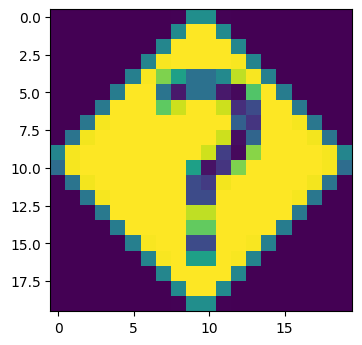

In [ ]:
plt.figure(dpi = 100)
plt.imshow(image_5)
plt.show()

In [ ]:
# split data set into a training set (80%) and a test set (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# normalization
X_train, X_test = np.uint8(X_train / (2**8 - 1)), np.uint8(X_test / (2**8 - 1))

In [ ]:
#Y_train, Y_test = np.uint8(Y_train), np.uint8(Y_test)

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
n_input = X_train.shape[1:]
n_input

(20, 20, 1)

In [ ]:
n_h = 90
n_h

90

In [ ]:
n_output = len(base_name)
n_output

5

In [ ]:
n_batch = int(np.sqrt(X_train.shape[0]))
n_batch

118

In [ ]:
n_epoch = 80
n_epoch

80

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize = False, title = None, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (16,8))
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap, vmin = 0, vmax = 1)
    ax.figure.colorbar(im, ax = ax)
    # We want to show all ticks...
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right",
             rotation_mode = "anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha = "center", va = "center",
                    color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
classes = np.array(list(range(n_output)))

In [ ]:
n_channels = n_input[-1]
n_channels

1

In [ ]:
# in 1st 2D convolutional layer 
n_filters_1 = 32
filter_size_1 = 5 

# The filter is a matrix of integers that are used on a subset of the input pixel values, 
# the same size as the kernel.

#num_weight_1 = (n_filters * filter_size_1 * filter_size_1 * n_channels) + n_filters
#num_weight_1

In [ ]:
# in 3rd 2D convolutional layer 
n_filters_3 = 64
filter_size_3 = 3 

#num_weight_3 = (n_filters * filter_size_3 * filter_size_3 * n_channels) + n_filters
#num_weight_3

**Stride** is a component of convolutional neural networks, or neural networks tuned for the compression of images and video data. Stride is a parameter of the neural network's filter that modifies the amount of movement over the image or video. For example, if a neural network's stride is set to 1, the filter will move one pixel, or unit,  at a time. The size of the filter affects the encoded output volume, so stride is often set to a whole integer, rather than a fraction or decimal.

In [ ]:
n_hidden = [90, 150, 200]
for index, value in enumerate(n_hidden):
  # Input -> Conv.1 -> Maxpool.1 -> Conv.2 -> Maxpool.2 -> Flatten -> H -> Output -> softmax -> probability

  exec('model_{y} = Sequential()'.format(y = index + 1))

  exec('model_{y}.add(keras.layers.Input(shape = n_input))'.format(y = index + 1))

  exec('model_{y}.add( keras.layers.Dropout(rate = 0.4) )'.format(y = index + 1))
  
  exec("model_{y}.add(Conv2D(filters = n_filters_1, kernel_size = (filter_size_1, filter_size_1), strides = (1, 1), padding = 'same', activation = 'relu'))".format(y = index + 1))
  
  # output_shape = (input_shape - pool_size + 1) / strides)
  exec('model_{y}.add( MaxPooling2D(pool_size = (2, 2), strides = (2, 2)) )'.format(y = index + 1))

  exec('model_{y}.add( keras.layers.Dropout(rate = 0.4) )'.format(y = index + 1))
   
  exec("model_{y}.add(Conv2D(filters = n_filters_3, kernel_size = (filter_size_3, filter_size_3), strides = (1, 1), padding = 'same', activation = 'relu'))".format(y = index + 1))

  exec('model_{y}.add( MaxPooling2D(pool_size = (2, 2), strides = (2, 2)) )'.format(y = index + 1))

  exec('model_{y}.add( keras.layers.Dropout(rate = 0.4) )'.format(y = index + 1))

  exec('model_{y}.add(Flatten())'.format(y = index + 1))

  exec("model_{y}.add(Dense(units = {x}, activation = 'relu'))".format(x = value, y = index + 1))

  exec('model_{y}.add( keras.layers.Dropout(rate = 0.2) )'.format(y = index + 1))

  exec('model_{y}.add(Dense(units = n_output))'.format(y = index + 1))

  exec("model_{y}.add(Activation('softmax'))".format(y = index + 1))

  from tensorflow.keras import optimizers, losses
  opt = optimizers.Adam(lr = 1e-3, decay = 1e-7)
  loss_fn = losses.CategoricalCrossentropy()

  exec("model_{y}.compile(loss = loss_fn, optimizer = opt, metrics = ['accuracy'])".format(y = index + 1))

  from tensorflow.keras.callbacks import ModelCheckpoint
  exec("checkpointer_{y} = ModelCheckpoint(filepath = 'weights.hdf5_{y}', monitor = 'val_accuracy', save_best_only = True)".format(y = index + 1)) 

  from tensorflow.keras import callbacks
  # for recording training loss over the whole training set at the end of each epoch
  class MyHistory(callbacks.Callback):
    def on_train_begin(self, logs = None):
      self.gradient = []
      self.gradsNorm = []
      self.batch_loss = []
      self.epoch_loss = []
      self.epoch_accuracy = [] 
    def on_epoch_end(self, epoch, logs = None):
      with tf.GradientTape() as tape:
        exec('Y_batch_pred_{y} = model_{y}(X_train, training = True)'.format(y = index + 1))
        exec('loss_val_{y} = loss_fn(Y_train,Y_batch_pred_{y})'.format(y = index + 1))
      exec('grads_{y} = tape.gradient(loss_val_{y}, model_{y}.trainable_weights)'.format(y = index + 1))
      exec('self.gradsNorm.append(np.sqrt(sum([np.sum(np.square(g.numpy())) for g in grads_{y}])))'.format(y = index + 1))
      exec('self.gradient.append(grads_{y})'.format(y = index + 1))
      exec('self.batch_loss.append(loss_val_{y}.numpy())'.format(y = index + 1))
      exec('epoch_loss_value_{y} = model_{y}.evaluate(X_train, Y_train, verbose = 1)[0]'.format(y = index + 1))
      exec('self.epoch_loss.append(epoch_loss_value_{y})'.format(y = index + 1))
      exec('epoch_accuracy_value_{y} = model_{y}.evaluate(X_train, Y_train, verbose = 0)[1]'.format(y = index + 1))
      exec('self.epoch_accuracy.append(epoch_accuracy_value_{y})'.format(y = index + 1))
  exec("MyMonitor_{y} = MyHistory()".format(y = index + 1))

  exec('Monitor_{y} = model_{y}.fit(x = X_train, y = Y_train, batch_size = n_batch, epochs = n_epoch, validation_data = (X_test, Y_test), callbacks = [checkpointer_{y}, MyMonitor_{y}], shuffle = True)'.format(y = index + 1))

  from tensorflow.keras.models import load_model
  exec("trained_model_{y} = load_model('weights.hdf5_{y}')".format(y = index + 1))

  exec('Y_pred_train_{y} = trained_model_{y}.predict(X_train)'.format(y = index + 1))
  exec('Y_pred_test_{y} = trained_model_{y}.predict(X_test)'.format(y = index + 1))

  exec('Ylabel_train_{y} = np.argmax(np.array(Y_train), axis = 1)'.format(y = index + 1))
  exec('Ylabel_test_{y} = np.argmax(np.array(Y_test), axis = 1)'.format(y = index + 1))

  exec('Ypredlabel_train_{y} = np.argmax(Y_pred_train_{y}, axis = 1)'.format(y = index + 1))
  exec('Ypredlabel_test_{y} = np.argmax(Y_pred_test_{y}, axis = 1)'.format(y = index + 1))

  exec('training_loss_{y} = MyMonitor_{y}.epoch_loss'.format(y = index + 1))
  exec("validation_loss_{y} = Monitor_{y}.history['val_loss']".format(y = index + 1))
  exec('batch_loss_{y} = MyMonitor_{y}.batch_loss'.format(y = index + 1))
  exec('training_accuracy_{y} = MyMonitor_{y}.epoch_accuracy'.format(y = index + 1))
  exec("validation_accuracy_{y} = Monitor_{y}.history['val_accuracy']".format(y = index + 1))
  exec("grads_N_{y} = MyMonitor_{y}.gradsNorm".format(y = index + 1))

  exec('last_epoch = len(pd.DataFrame(Monitor_{y}.history).index)'.format(y = index + 1))

  from sklearn import svm, datasets
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import confusion_matrix
  from sklearn.utils.multiclass import unique_labels
  exec('cm_train_{y} = confusion_matrix(Ylabel_train_{y}, Ypredlabel_train_{y})'.format(y = index + 1))
  exec('cm_test_{y} = confusion_matrix(Ylabel_test_{y}, Ypredlabel_test_{y})'.format(y = index + 1)) 

  exec('trainperf_{y} = np.sum(np.diag(cm_train_{y})) / np.sum(cm_train_{y})'.format(y = index + 1)) # total percentage of correct classifications for train set
  exec('testperf_{y} = np.sum(np.diag(cm_test_{y})) / np.sum(cm_test_{y})'.format(y = index + 1)) # total percentage of correct classifications for test set

Epoch 1/80
120/120 [==============================] - 34s 10ms/step - loss: 1.5634 - accuracy: 0.3034 - val_loss: 1.4877 - val_accuracy: 0.3780
INFO:tensorflow:Assets written to: weights.hdf5_1/assets
441/441 [==============================] - 1s 3ms/step - loss: 1.4815 - accuracy: 0.3840
Epoch 2/80
120/120 [==============================] - 1s 5ms/step - loss: 1.4288 - accuracy: 0.4029 - val_loss: 1.4161 - val_accuracy: 0.4373
INFO:tensorflow:Assets written to: weights.hdf5_1/assets
441/441 [==============================] - 1s 2ms/step - loss: 1.4008 - accuracy: 0.4553
Epoch 3/80
120/120 [==============================] - 1s 5ms/step - loss: 1.3797 - accuracy: 0.4222 - val_loss: 1.3868 - val_accuracy: 0.4449
INFO:tensorflow:Assets written to: weights.hdf5_1/assets
441/441 [==============================] - 1s 3ms/step - loss: 1.3708 - accuracy: 0.4649
Epoch 4/80
120/120 [==============================] - 1s 5ms/step - loss: 1.3409 - accuracy: 0.4447 - val_loss: 1.3711 - val_accuracy:

In [ ]:
trained_model_1.summary() # for n_hidden = 90

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 20, 20, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 20, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0

In [ ]:
trained_model_2.summary() # for n_hidden = 150

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 20, 20, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)         

In [ ]:
trained_model_3.summary() # for n_hidden = 200

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_8 (Dropout)          (None, 20, 20, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 5, 64)         

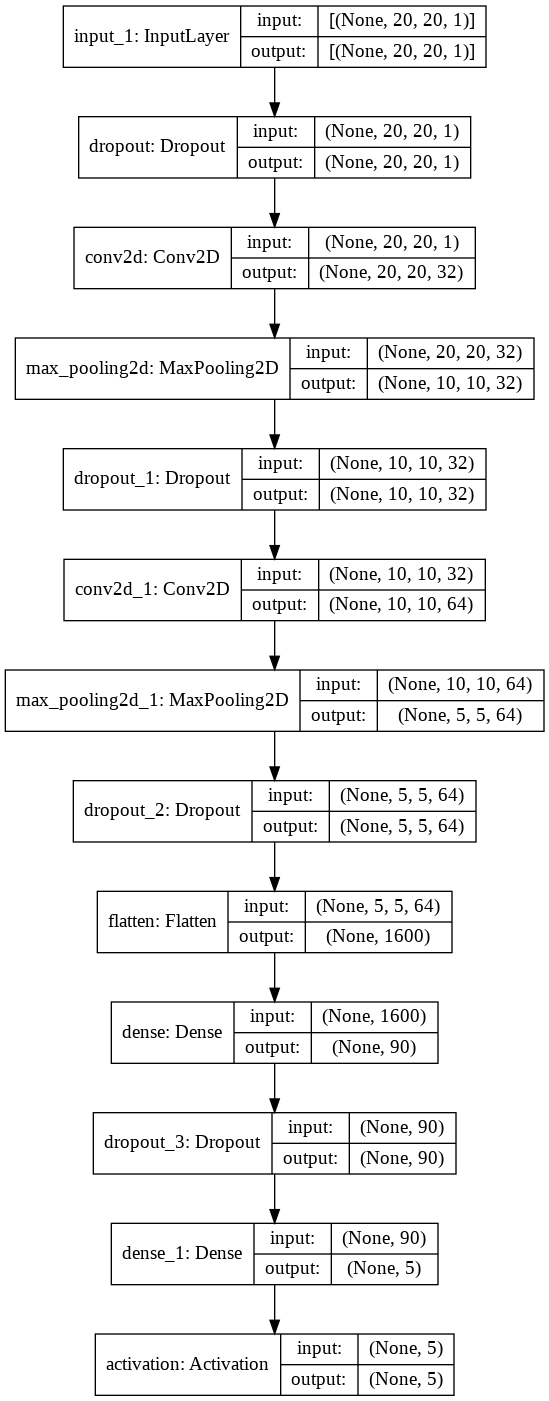

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = trained_model_1, show_shapes = True, show_layer_names = True)

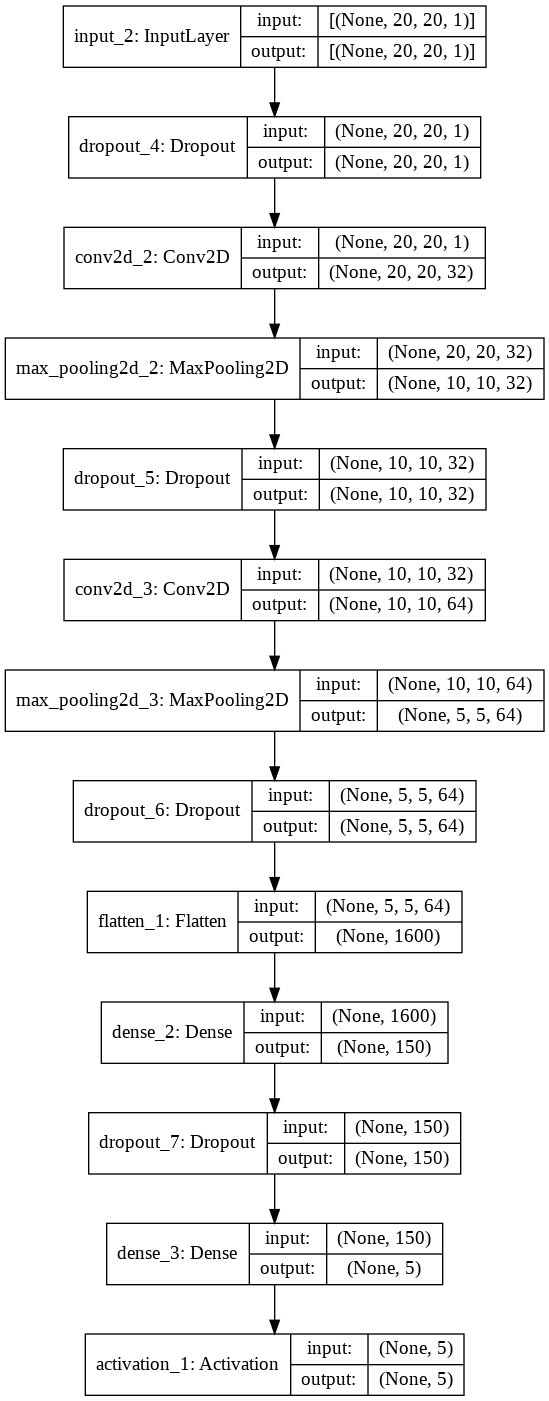

In [ ]:
plot_model(model = trained_model_2, show_shapes = True, show_layer_names = True)

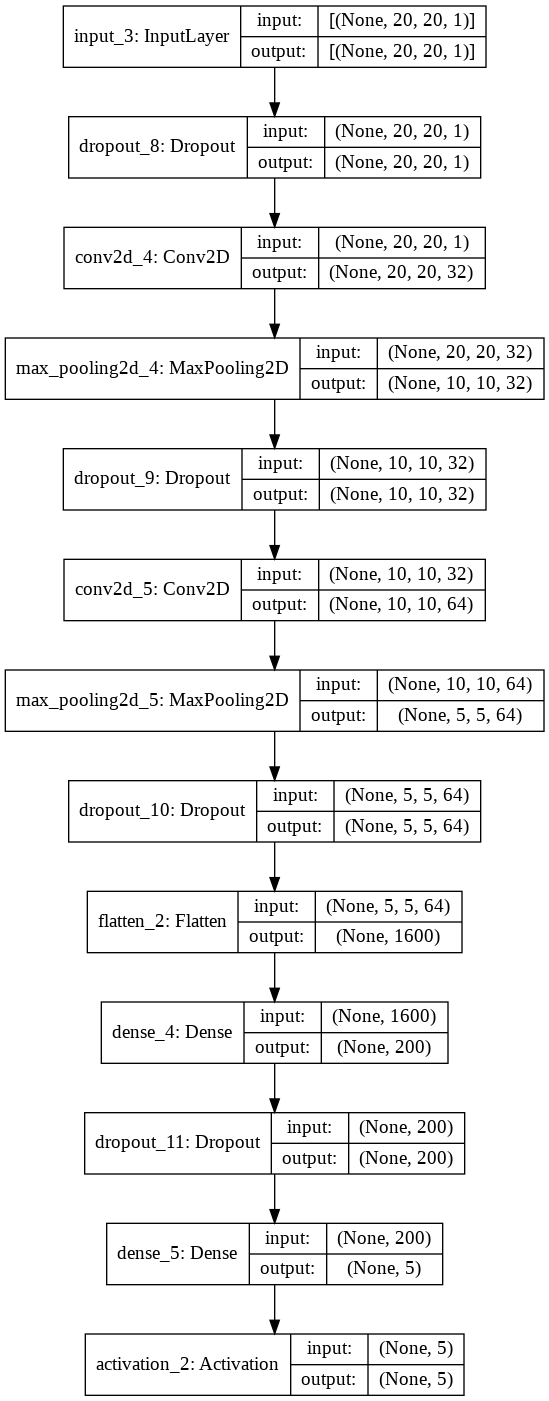

In [ ]:
plot_model(model = trained_model_3, show_shapes = True, show_layer_names = True)

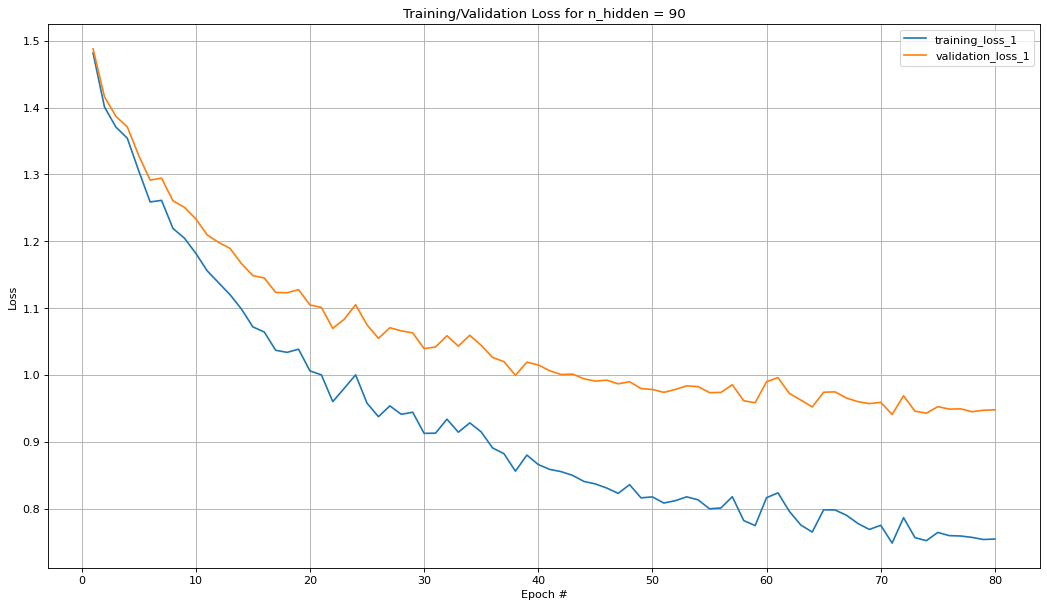

In [ ]:
plt.figure(figsize = (16, 9), dpi = 80)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    training_loss_1,
    label = 'training_loss_1'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    validation_loss_1,
    label = 'validation_loss_1'
)
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title(f'Training/Validation Loss for n_hidden = {n_hidden[1 - 1]}')
plt.legend() 
# axes = plt.gca()
# axes.set_ylim([0, np.max(mse.iloc[10:,].to_numpy())])
plt.grid()
plt.show()

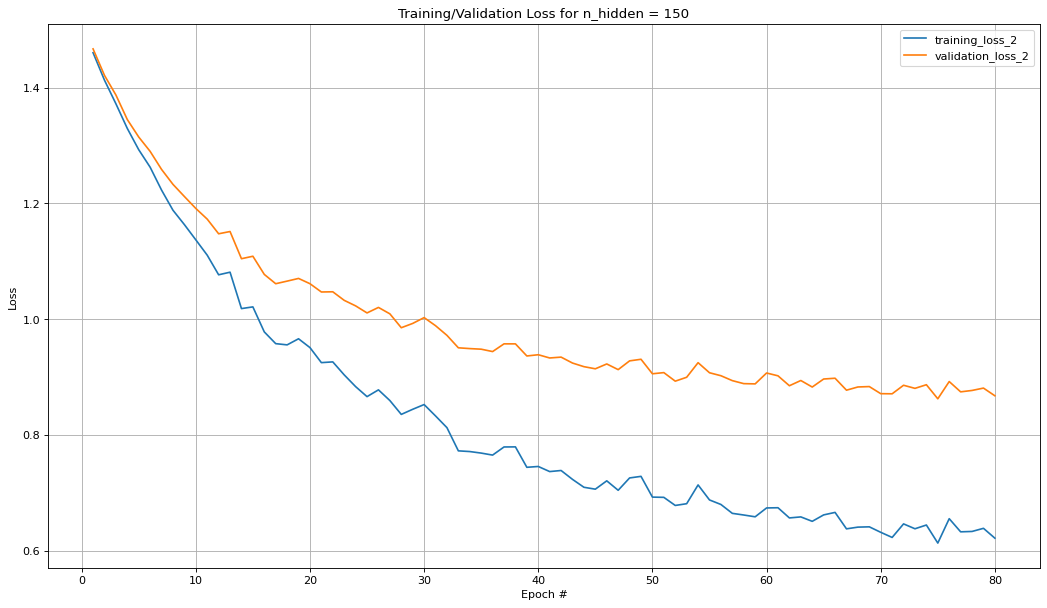

In [ ]:
plt.figure(figsize = (16, 9), dpi = 80)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    training_loss_2,
    label = 'training_loss_2'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    validation_loss_2,
    label = 'validation_loss_2'
)
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title(f'Training/Validation Loss for n_hidden = {n_hidden[2 - 1]}')
plt.legend() 
plt.grid()
plt.show()

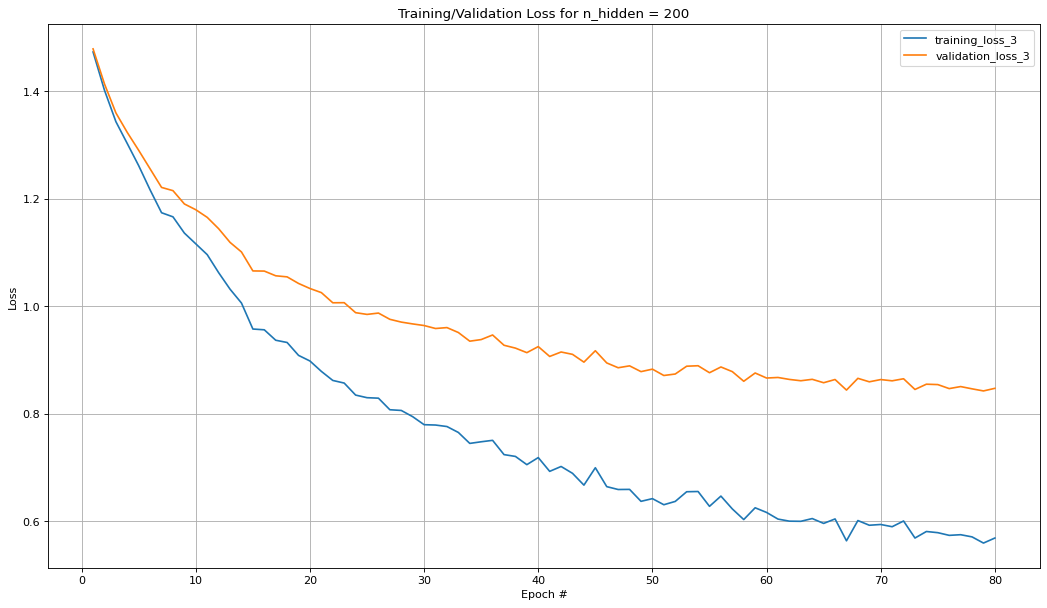

In [ ]:
plt.figure(figsize = (16, 9), dpi = 80)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    training_loss_3,
    label = 'training_loss_3'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    validation_loss_3,
    label = 'validation_loss_3'
)
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title(f'Training/Validation Loss for n_hidden = {n_hidden[3 - 1]}')
plt.legend() 
plt.grid()
plt.show()

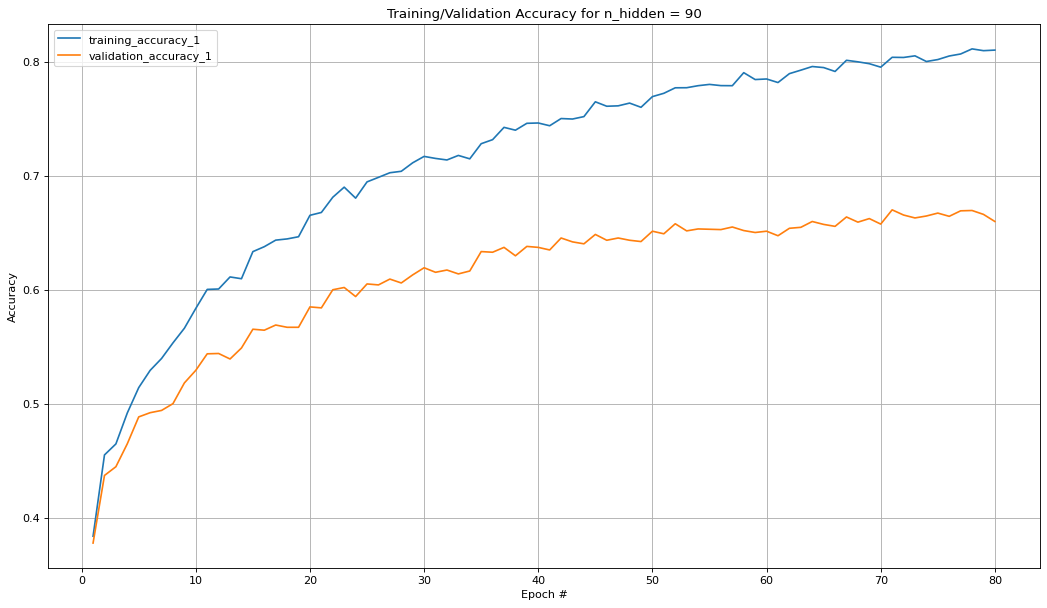

In [ ]:
plt.figure(figsize = (16, 9), dpi = 80)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    training_accuracy_1,
    label = 'training_accuracy_1'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    validation_accuracy_1,
    label = 'validation_accuracy_1'
)
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.title(f'Training/Validation Accuracy for n_hidden = {n_hidden[1 - 1]}')
plt.legend() 
plt.grid()
plt.show()

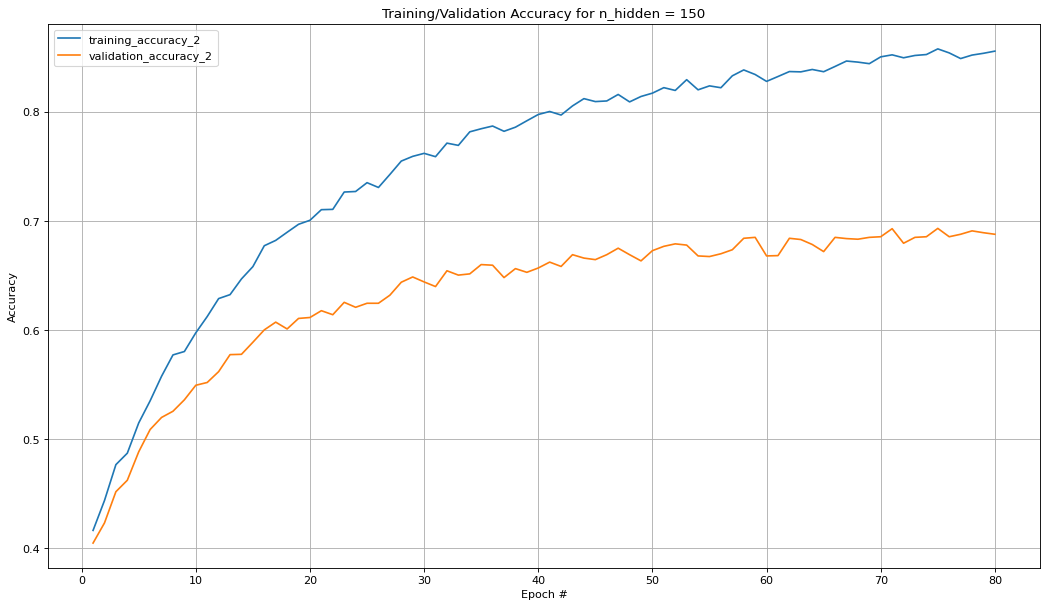

In [ ]:
plt.figure(figsize = (16, 9), dpi = 80)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    training_accuracy_2,
    label = 'training_accuracy_2'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    validation_accuracy_2,
    label = 'validation_accuracy_2'
)
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.title(f'Training/Validation Accuracy for n_hidden = {n_hidden[2 - 1]}')
plt.legend() 
plt.grid()
plt.show()

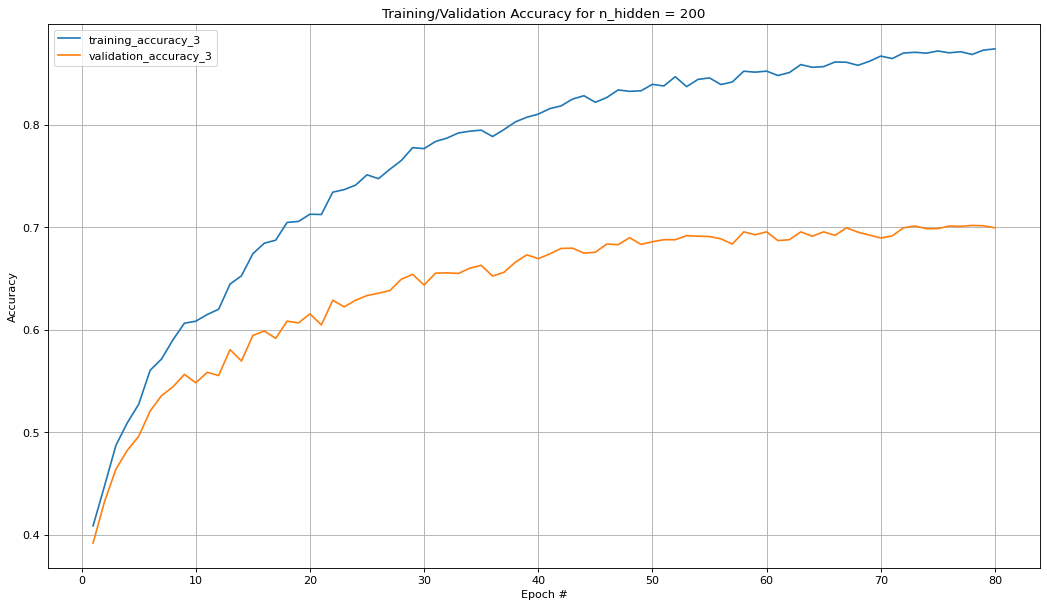

In [ ]:
plt.figure(figsize = (16, 9), dpi = 80)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    training_accuracy_3,
    label = 'training_accuracy_3'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    validation_accuracy_3,
    label = 'validation_accuracy_3'
)
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.title(f'Training/Validation Accuracy for n_hidden = {n_hidden[3 - 1]}')
plt.legend() 
plt.grid()
plt.show()

In [ ]:
monitor_data = np.column_stack((training_loss_1, validation_loss_1,
                                training_loss_2, validation_loss_2,
                                training_loss_3, validation_loss_3,
                                training_accuracy_1, validation_accuracy_1, 
                                training_accuracy_2, validation_accuracy_2, 
                                training_accuracy_3, validation_accuracy_3))
columns_name = ['training_loss_1', 'validation_loss_1',
                'training_loss_2', 'validation_loss_2',
                'training_loss_3', 'validation_loss_3',
                'training_accuracy_1', 'validation_accuracy_1', 
                'training_accuracy_2', 'validation_accuracy_2', 
                'training_accuracy_3', 'validation_accuracy_3']
monitor_data = pd.DataFrame(data = monitor_data, columns = columns_name)
monitor_data

,training_loss_1,validation_loss_1,training_loss_2,validation_loss_2,training_loss_3,validation_loss_3,training_accuracy_1,validation_accuracy_1,training_accuracy_2,validation_accuracy_2,training_accuracy_3,validation_accuracy_3
0,1.481545,1.487737,1.460117,1.466694,1.472955,1.478683,0.383977,0.377980,0.416265,0.404654,0.408672,0.391884
1,1.400840,1.416067,1.412675,1.420973,1.401816,1.413507,0.455294,0.437287,0.443656,0.423099,0.447417,0.432179
2,1.370813,1.386790,1.371978,1.387122,1.343369,1.359697,0.464945,0.444949,0.476582,0.451759,0.487156,0.463961
3,1.354123,1.371074,1.329307,1.344692,1.302513,1.323201,0.492123,0.465096,0.487085,0.462259,0.509225,0.482406
4,1.305437,1.328269,1.292612,1.314512,1.261384,1.289950,0.514334,0.488649,0.514831,0.488366,0.527391,0.496027
...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.759746,0.948958,0.655513,0.892289,0.574089,0.846994,0.805209,0.664586,0.854173,0.685585,0.870210,0.701192
76,0.759205,0.949379,0.632822,0.874510,0.575299,0.850769,0.806983,0.669410,0.848992,0.687855,0.871274,0.700908
77,0.757102,0.945135,0.633467,0.876922,0.571252,0.846546,0.811453,0.669694,0.852186,0.690976,0.868578,0.701759
78,0.753922,0.947271,0.638867,0.881007,0.559752,0.842647,0.809892,0.666288,0.853818,0.689274,0.872836,0.701476


In [ ]:
monitor_data.to_excel(r'CNN_Monitor.xlsx', index = True, header = True)

In [ ]:
trained_model_1.evaluate(X_train,Y_train)

441/441 [==============================] - 1s 3ms/step - loss: 0.7486 - accuracy: 0.8041


[0.7486138343811035, 0.8040732145309448]

In [ ]:
trained_model_2.evaluate(X_train,Y_train)

441/441 [==============================] - 1s 3ms/step - loss: 0.6134 - accuracy: 0.8579


[0.6134068369865417, 0.8578625917434692]

In [ ]:
trained_model_3.evaluate(X_train,Y_train)

441/441 [==============================] - 1s 3ms/step - loss: 0.5713 - accuracy: 0.8686


[0.5712520480155945, 0.8685778975486755]

In [ ]:
print(trainperf_1)
print(trainperf_2)
print(trainperf_3)

0.8040732330400228
0.8578626170877094
0.8685779165483962


In [ ]:
print(testperf_1)
print(testperf_2)
print(testperf_3)

0.6702610669693531
0.6932463110102156
0.7017593643586834


In [ ]:
print(cm_train_1, "\n")
print(cm_test_1)

[[2059  119  157  135  109]
 [  24 2783   57  223   96]
 [ 177  323 2091  173  274]
 [  14  334   43 2179   84]
 [  41  204   82   92 2219]] 

[[409  35  76  59  50]
 [  8 604  30  71  35]
 [ 80 113 375  74 114]
 [ 14 118  24 504  46]
 [ 31  73  71  40 470]]


In [ ]:
print(cm_train_2, "\n")
print(cm_test_2)

[[2233   81  100   89   76]
 [  13 2905   49  163   53]
 [  99  296 2338  118  187]
 [  14  270   41 2264   65]
 [  25  130   65   69 2349]] 

[[438  32  69  45  45]
 [ 11 607  29  73  28]
 [ 74 112 399  68 103]
 [ 17 116  25 513  35]
 [ 31  57  70  41 486]]


In [ ]:
print(cm_train_3, "\n")
print(cm_test_3)

[[2319   91   49   77   43]
 [   6 2925   23  176   53]
 [ 111  319 2282  131  195]
 [  10  234   32 2315   63]
 [  14  129   45   51 2399]] 

[[444  37  50  46  52]
 [  8 598  31  74  37]
 [ 72 117 388  68 111]
 [ 16 113  16 533  28]
 [ 28  55  53  39 510]]


Normalized confusion matrix
[[0.79837146 0.04614192 0.06087631 0.05234587 0.04226444]
 [0.00754006 0.87433239 0.01790763 0.07005969 0.03016023]
 [0.05826201 0.10631995 0.68828176 0.05694536 0.09019092]
 [0.00527506 0.12584778 0.01620196 0.82102487 0.03165034]
 [0.01554208 0.07733131 0.03108415 0.03487491 0.84116755]]


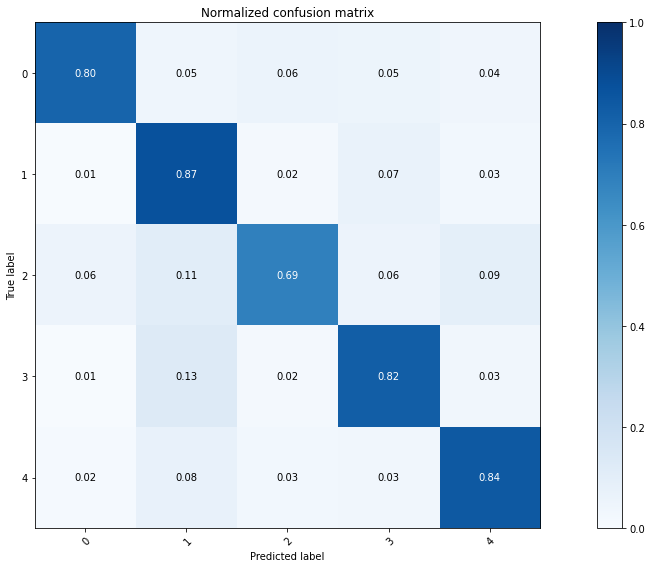

In [ ]:
plot_confusion_matrix(Ylabel_train_1, Ypredlabel_train_1, classes = classes, normalize = True, title = 'Normalized confusion matrix')
plt.show()

Normalized confusion matrix
[[0.65023847 0.05564388 0.12082671 0.09379968 0.07949126]
 [0.01069519 0.80748663 0.04010695 0.09491979 0.04679144]
 [0.10582011 0.1494709  0.49603175 0.0978836  0.15079365]
 [0.01983003 0.16713881 0.03399433 0.71388102 0.06515581]
 [0.04525547 0.10656934 0.10364964 0.05839416 0.68613139]]


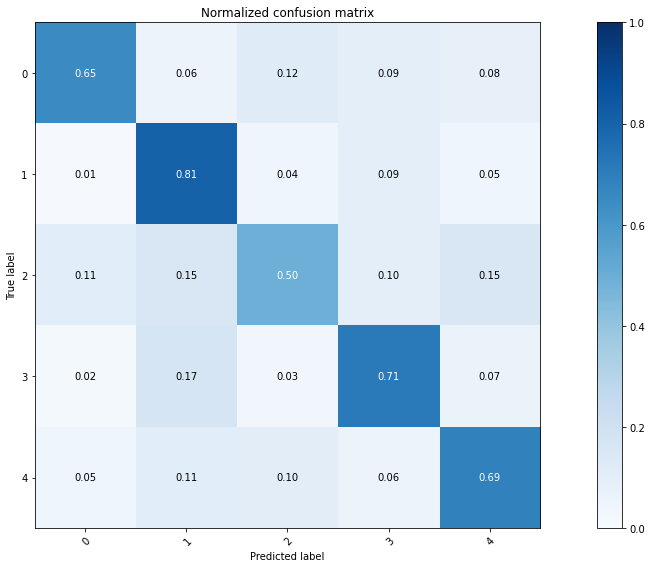

In [ ]:
plot_confusion_matrix(Ylabel_test_1, Ypredlabel_test_1, classes = classes, normalize = True, title = 'Normalized confusion matrix')
plt.show()

Normalized confusion matrix
[[0.86583947 0.03140752 0.03877472 0.0345095  0.02946879]
 [0.0040842  0.91266101 0.01539428 0.05120955 0.01665096]
 [0.03258723 0.09743252 0.76958525 0.03884134 0.06155365]
 [0.00527506 0.10173323 0.01544838 0.853052   0.02449133]
 [0.00947688 0.04927976 0.02463988 0.02615618 0.89044731]]


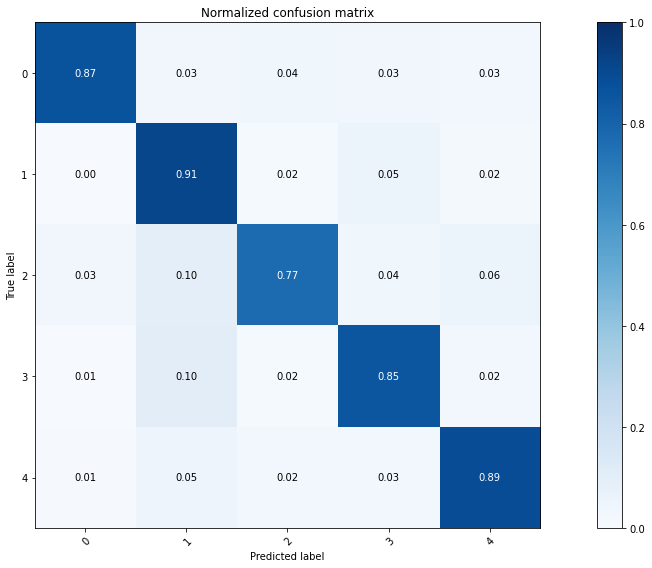

In [ ]:
plot_confusion_matrix(Ylabel_train_2, Ypredlabel_train_2, classes = classes, normalize = True, title = 'Normalized confusion matrix')
plt.show()

Normalized confusion matrix
[[0.6963434  0.0508744  0.10969793 0.07154213 0.07154213]
 [0.01470588 0.81149733 0.03877005 0.09759358 0.03743316]
 [0.0978836  0.14814815 0.52777778 0.08994709 0.13624339]
 [0.02407932 0.16430595 0.03541076 0.7266289  0.04957507]
 [0.04525547 0.08321168 0.10218978 0.05985401 0.70948905]]


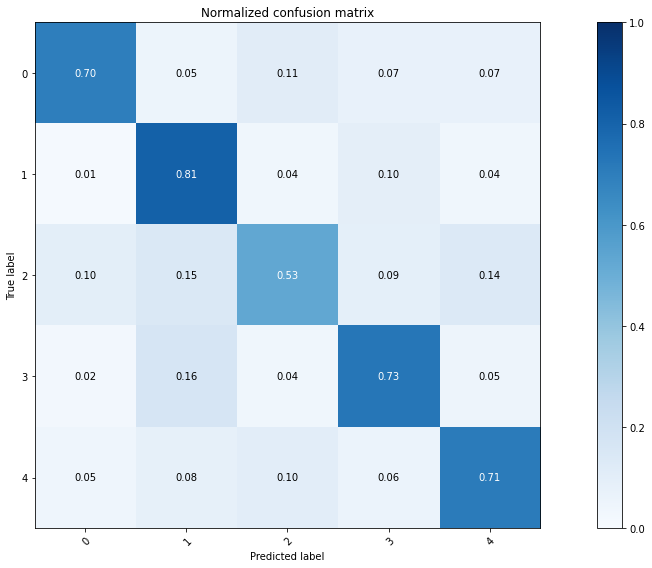

In [ ]:
plot_confusion_matrix(Ylabel_test_2, Ypredlabel_test_2, classes = classes, normalize = True, title = 'Normalized confusion matrix')
plt.show()

Normalized confusion matrix
[[0.89918573 0.03528499 0.01899961 0.02985653 0.01667313]
 [0.00188501 0.91894439 0.00722589 0.05529375 0.01665096]
 [0.0365372  0.10500329 0.75115207 0.04312047 0.06418697]
 [0.0037679  0.0881688  0.01205727 0.87226827 0.02373775]
 [0.00530705 0.04890068 0.01705838 0.01933283 0.90940106]]


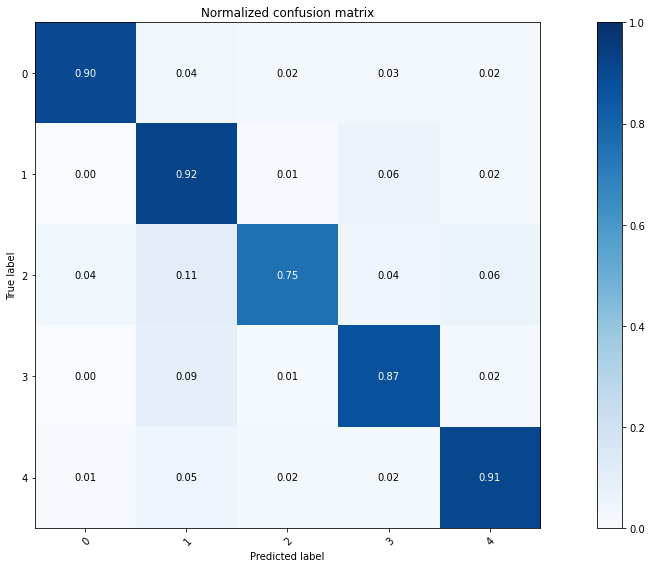

In [ ]:
plot_confusion_matrix(Ylabel_train_3, Ypredlabel_train_3, classes = classes, normalize = True, title = 'Normalized confusion matrix')
plt.show()

Normalized confusion matrix
[[0.70588235 0.05882353 0.07949126 0.07313196 0.08267091]
 [0.01069519 0.79946524 0.04144385 0.09893048 0.04946524]
 [0.0952381  0.1547619  0.51322751 0.08994709 0.1468254 ]
 [0.02266289 0.16005666 0.02266289 0.75495751 0.03966006]
 [0.04087591 0.08029197 0.07737226 0.05693431 0.74452555]]


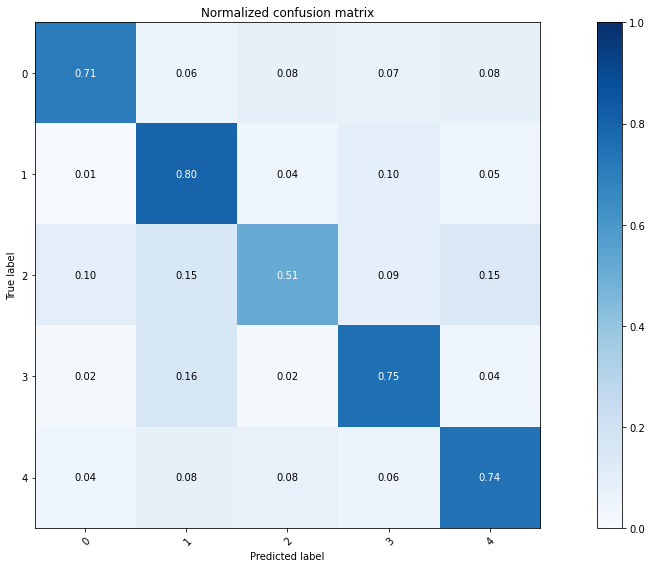

In [ ]:
plot_confusion_matrix(Ylabel_test_3, Ypredlabel_test_3, classes = classes, normalize = True, title = 'Normalized confusion matrix')
plt.show()